# Class 9: Data visualization

Plan for today:
- Review and continuaton of data visualization using matplotlib
- If there is time: Data visualization using seaborn


## Notes on the class Jupyter setup

If you have the *ydata123_2024a* environment set up correctly, you can get the class code using the code below (which presumably you've already done given that you are seeing this notebook). 

In [41]:
import YData

# YData.download.download_class_code(9)   # get class code    
# YData.download.download_class_code(9, True)  # get the code with the answers 

#YData.download.download_data("monthly_egg_prices.csv")
#YData.download.download_data("nba_salaries_2022_23.csv")
#YData.download.download_data("nba_position_names.csv")
#YData.download.download_data("US_Gasoline_Prices_Weekly.csv")

import urllib.request
basename = "https://raw.githubusercontent.com/emeyers/YData/main/ClassMaterial/data/" 
urllib.request.urlretrieve(basename + "monthly_egg_prices.csv", "monthly_egg_prices.csv")
urllib.request.urlretrieve(basename + "nba_salaries_2022_23.csv", "nba_salaries_2022_23.csv")
urllib.request.urlretrieve(basename + "nba_position_names.csv", "nba_position_names.csv")
urllib.request.urlretrieve(basename + "US_Gasoline_Prices_Weekly.csv", "US_Gasoline_Prices_Weekly.csv")

('US_Gasoline_Prices_Weekly.csv', <http.client.HTTPMessage at 0x1775c0890>)

There are also similar functions to download the homework:

In [42]:
#YData.download.download_homework(4)  # downloads the homework 

If you are using colabs, you should install polars and the YData packages by uncommenting and running the code below.

In [43]:
# !pip install https://github.com/emeyers/YData_package/tarball/master

If you are using google colabs, you should also uncomment and run the code below to mount the your google drive

In [44]:
# from google.colab import drive
# drive.mount('/content/drive')

In [45]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

### Joing review: Spelling out NBA position names

As you will recall, our NBA salaries DataFrame had the different positions listed as abbreviations such as "C" and "PG". 

Often it is hard to tell what these abbreviations (or codes) mean, so a common use of joining is to join on to a table a list of longer names that give more meaning to abbreviations. 

Below we load our `nba_salaries` DataFrame along with a `nba_positions` DataFrame which has information about how each position abbreviation maps on to the position's full name.

Let's merge these DataFrames together so that our `nba_salaries` DataFrame has the full position names!



In [46]:
nba_salaries = pd.read_csv("nba_salaries_2022_23.csv")

nba_salaries.head(3)


,PLAYER,POSITION,TEAM,SALARY
0,De'Andre Hunter,SF,Atlanta Hawks,9.835881
1,Jalen Johnson,SF,Atlanta Hawks,2.792640
2,AJ Griffin,SF,Atlanta Hawks,3.536160


In [47]:
nba_positions = pd.read_csv("nba_position_names.csv")
nba_positions

,Position Abbreviation,Position Name
0,PG,Point Guard
1,SG,Shooting Guard
2,C,Center
3,SF,Small Forward
4,PF,Power Forward


In [48]:
# Merge the nba_position DataFrame on to the nba_salaries DataFrame so each player's position is the full position name
# think about which columns should be used when merging the data (hint: look at the DataFrames above)

nba_improved = nba_salaries.merge(nba_positions, 
                                  left_on = "POSITION", 
                                  right_on = "Position Abbreviation")

nba_improved.head(5)

,PLAYER,POSITION,TEAM,SALARY,Position Abbreviation,Position Name
0,De'Andre Hunter,SF,Atlanta Hawks,9.835881,SF,Small Forward
1,Jalen Johnson,SF,Atlanta Hawks,2.792640,SF,Small Forward
2,AJ Griffin,SF,Atlanta Hawks,3.536160,SF,Small Forward
3,Jarrett Culver,SF,Atlanta Hawks,0.260295,SF,Small Forward
4,Justin Champagnie,SF,Boston Celtics,0.853241,SF,Small Forward


In [49]:
# remove unnecessary columns using the .drop(colums = )  method

nba_improved.drop(columns = ["POSITION", "Position Abbreviation"])


,PLAYER,TEAM,SALARY,Position Name
0,De'Andre Hunter,Atlanta Hawks,9.835881,Small Forward
1,Jalen Johnson,Atlanta Hawks,2.792640,Small Forward
2,AJ Griffin,Atlanta Hawks,3.536160,Small Forward
3,Jarrett Culver,Atlanta Hawks,0.260295,Small Forward
4,Justin Champagnie,Boston Celtics,0.853241,Small Forward
...,...,...,...,...
462,Kelly Olynyk,Utah Jazz,12.804878,Center
463,Udoka Azubuike,Utah Jazz,2.174880,Center
464,Taj Gibson,Washington Wizards,2.905851,Center
465,Daniel Gafford,Washington Wizards,1.930681,Center


### Warm-up exercieses: Further exploration of the NBA salaries

See if you can calculate the following quantities: 

1. The average salary for each position. 
2. The total salary for each team



In [50]:
# Get the average salary for each position

position_ave_salary = (nba_improved
                   .groupby("Position Name")
                   .agg(Average_salary = ("SALARY", "mean"))
                   .sort_values("Average_salary", ascending = False)
                   .reset_index()
                  )

position_ave_salary.head(5)


,Position Name,Average_salary
0,Point Guard,11.829674
1,Power Forward,8.885045
2,Small Forward,8.165048
3,Center,7.282722
4,Shooting Guard,6.851720


In [51]:
# Get the total salary for each team

team_tot_salary = (nba_improved
                   .groupby("TEAM")
                   .agg(Total_salary = ("SALARY", "sum"))
                   .sort_values("Total_salary", ascending = False)
                   .reset_index()
                  )

team_tot_salary.head(5)


,TEAM,Total_salary
0,Los Angeles Clippers,237.425045
1,Brooklyn Nets,236.830400
2,Los Angeles Lakers,229.789746
3,Golden State Warriors,209.554954
4,Milwaukee Bucks,194.676425


In [52]:
# Get just the Celtics data using the .query() method

team_tot_salary.query("TEAM == 'Boston Celtics'")


,TEAM,Total_salary
5,Boston Celtics,175.883495


## Data visualization!

Let's review and continue using additional features of the matplotlib package to visualize data. 

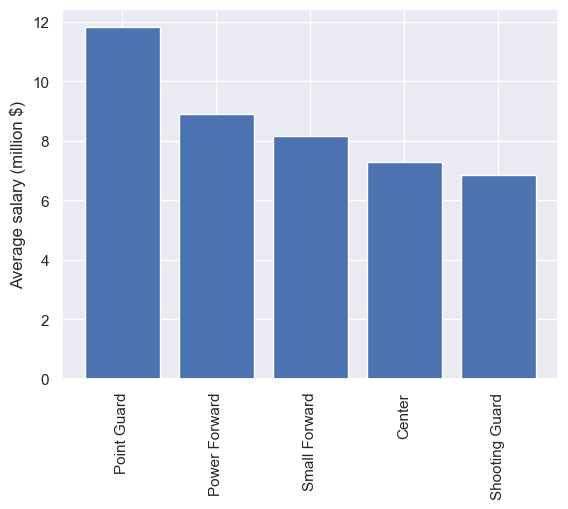

In [53]:
## Let's warm-up by visualizing the average NBA salary at each position using the position_ave_salary DataFrame
## Hint: the plt.bar() function could be useful

# Visualize the results
plt.bar(position_ave_salary["Position Name"], position_ave_salary["Average_salary"]);
plt.xticks(rotation=90);
plt.ylabel("Average salary (million $)");

# Also as a pie chart
#plt.figure()
#plt.pie(position_ave_salary["Average_salary"], labels = position_ave_salary["Position Name"]);

# Can also visualize the total team salaries
# plt.bar(team_tot_salary.TEAM, team_tot_salary.Total_salary);
# plt.xticks(rotation=90);
# plt.ylabel("Total salary (million $)");


### Let's join the Egg and Gas data and visualize them as well

In [54]:
egg_prices = pd.read_csv("monthly_egg_prices.csv", parse_dates=[0], date_format="%m/%d/%y")
egg_prices.head(3)

,DATE,Price
0,1980-01-01,0.879
1,1980-02-01,0.774
2,1980-03-01,0.812


In [55]:
gas_prices = pd.read_csv("US_Gasoline_Prices_Weekly.csv", parse_dates=[0], date_format="%m/%d/%y")
gas_prices['Week'] = pd.to_datetime(gas_prices['Week'], format="%m/%d/%Y")

gas_prices.head(3)


,Week,DollarsPerGallon
0,2024-01-15,3.058
1,2024-01-08,3.073
2,2024-01-01,3.089


In [56]:
# Use an inner join to merge the egg and gas prices
# Q: what should the left_on and right_on arguments be set to?  
prices = egg_prices.merge(gas_prices, how = "inner", left_on = "DATE", right_on = "Week")

prices.head(3)

,DATE,Price,Week,DollarsPerGallon
0,1990-10-01,1.012,1990-10-01,1.321
1,1991-04-01,1.002,1991-04-01,1.052
2,1991-07-01,0.966,1991-07-01,1.104


In [57]:
# only keep the columns we need which are: the week, and the prices of eggs and gas
prices = prices[["Week", "Price", "DollarsPerGallon"]]

prices.head(3)

,Week,Price,DollarsPerGallon
0,1990-10-01,1.012,1.321
1,1991-04-01,1.002,1.052
2,1991-07-01,0.966,1.104


In [58]:
# rename the egg prices to "Eggs" and the gas prices to "Gas"

prices = prices.rename(columns = {"Price": "Eggs", "DollarsPerGallon":"Gas"})
prices.head(3)


,Week,Eggs,Gas
0,1990-10-01,1.012,1.321
1,1991-04-01,1.002,1.052
2,1991-07-01,0.966,1.104


#### Now let's visualize the data!

Let's now visualize the egg and gas prices.


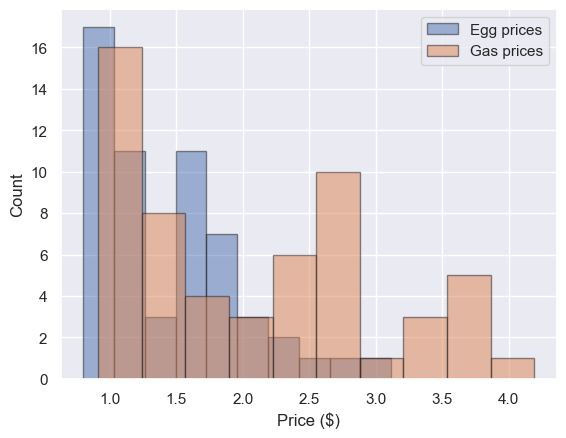

In [59]:
# Plot overlapping histograms of the egg and gas prices.

plt.hist(prices.Eggs, edgecolor = "k", alpha = .5, label = "Egg prices");
plt.hist(prices.Gas, edgecolor = "k", alpha = .5, label = "Gas prices");
plt.legend();
plt.xlabel("Price ($)");
plt.ylabel("Count");

### Boxplots

Boxplots are a visualization of the 5 number summary which is: min, Q1, median, Q3 and max (where Q1 is the 25th quantile, and Q3 is the 75h quantile). 

We can get quantiles using `np.quantile(ndarray, proportion)`.

We can create boxplots using the `plt.boxplot()` function. 


In [60]:
# Can you calculate the 5 number summary for the egg prices? 

# get Q1, median, Q3
print(np.quantile(prices["Eggs"], [.25, .5, .75]))

# another way to get the median
print(np.median(prices["Eggs"]))

# get the min and max
print(np.min(prices["Eggs"]))
print(np.max(prices["Eggs"]))

[1.009 1.414 1.769]
1.414
0.801
3.116


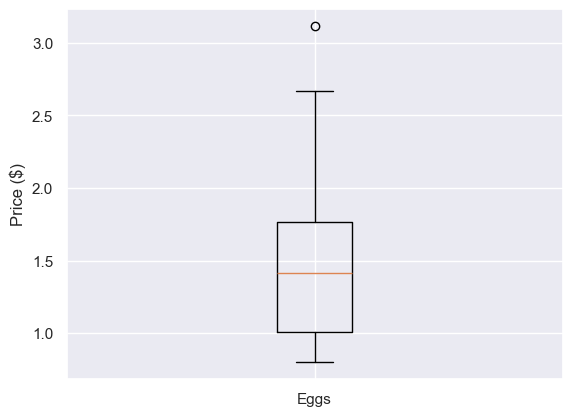

In [61]:
# boxplot of egg prices
plt.boxplot(prices["Eggs"], labels = ["Eggs"]);
plt.ylabel("Price ($)");

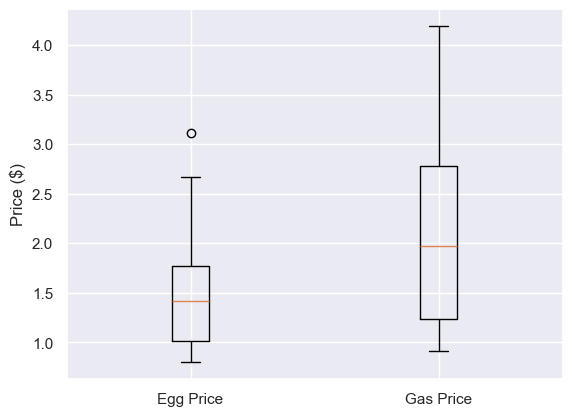

In [62]:
# plot side-by-side box plots

plt.boxplot([prices.Eggs, prices.Gas], labels= ["Egg Price", "Gas Price"]);
plt.ylabel("Price ($)");

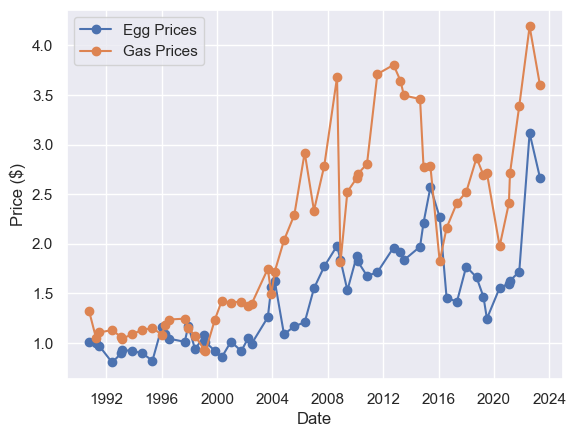

In [63]:
# Let's compare gas and egg prices as time series

plt.plot(prices.Week, prices.Eggs, 'o-', label = "Egg Prices");
plt.plot(prices.Week, prices.Gas, 'o-', label = "Gas Prices");
plt.legend()
plt.xlabel("Date");
plt.ylabel("Price ($)");

### Scatter plots

We can create a simple scatter plots using: `plt.plot()`

For more complex scatter plots we can use: `plot.scatter()`

Let's start by looking at the simple `plt.plot()`

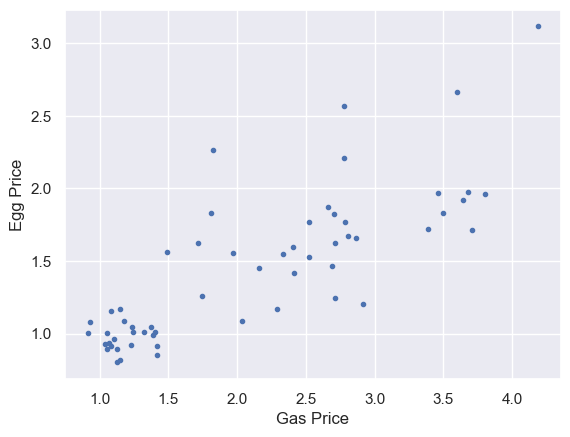

In [64]:
# Create a basic scatter plot of Egg prices vs. Gas prices using plt.plot()

plt.plot(prices["Gas"], prices["Eggs"], ".");
plt.xlabel("Gas Price");
plt.ylabel("Egg Price");


Let's now create a DataFrame called `prices2` which is the same as our `prices` DataFrame but it also has an additional column called `after2000`. We will use this column to plots points before the year 2000 in a different color than points after 2000. 

In particular, the `after2000` column should be set to the string "red" for points that occur before 2000 and to the string "green" for points that occured after 2000. 


In [65]:
# Add a column called "before2000" which has values that are 
# "green" for years before 2000, "red" for years after 2000

prices2 = prices.copy()

prices2["before2000"] = "red"
boolean_after_2020 = prices2.Week > np.datetime64("1999-12-31")
prices2.loc[boolean_after_2020, "before2000"] = "green"

prices2.head(3)

,Week,Eggs,Gas,before2000
0,1990-10-01,1.012,1.321,red
1,1991-04-01,1.002,1.052,red
2,1991-07-01,0.966,1.104,red


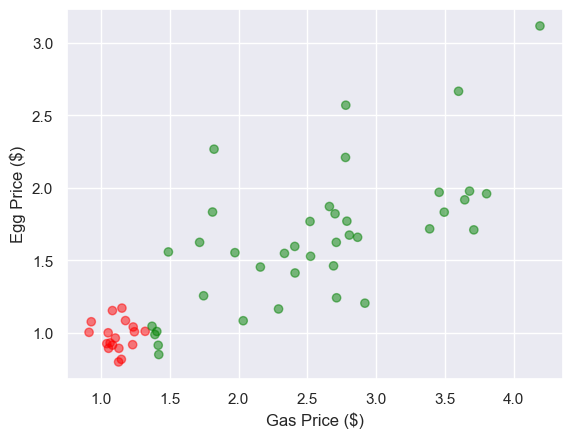

In [66]:
# Create a fancier scatter plot of Egg prices vs. Gas prices using plt.scatter()
plt.scatter(prices2["Gas"], prices2["Eggs"], 
            #s = prices2["Wheat"],   # could map additional columns as the size
            color = prices2["before2000"], 
            alpha = .5);

plt.xlabel("Gas Price ($)");
plt.ylabel("Egg Price ($)");

### Subplot: the pyplot interface

There are two ways to create subplots in matplotlib using either:

1. The pyplot interface
2. The axes interface

To create subplots using the pyplot interface we can use the `subplot` function:

`plt.subplot(num_rows, num_cols, curr_plot_num);`
`plt.plot(x, y);`


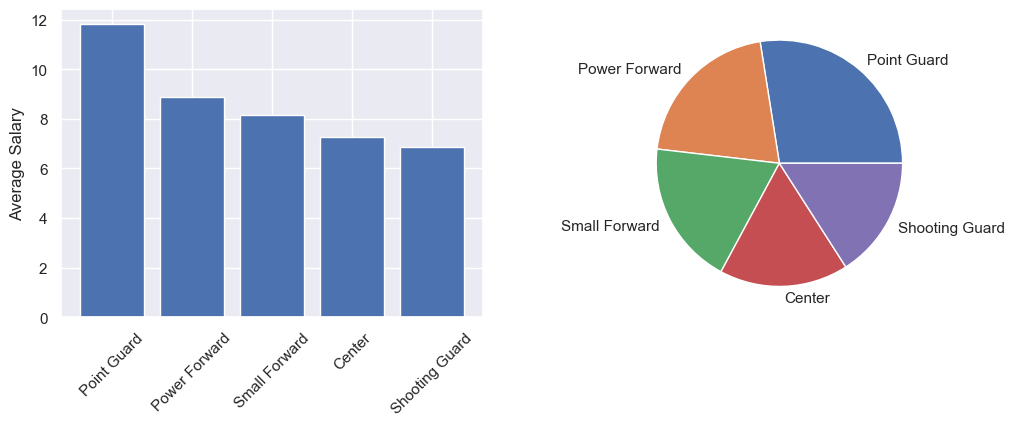

In [67]:
# change the figure size
plt.figure(figsize = (12, 4))

# subplots
plt.subplot(1, 2, 1);
plt.bar(position_ave_salary["Position Name"], position_ave_salary["Average_salary"]);
plt.xticks(rotation=45)
plt.ylabel("Average Salary");

plt.subplot(1, 2, 2);
plt.pie(position_ave_salary["Average_salary"], labels = position_ave_salary["Position Name"]);


### Using matplotlib as a general canvas

We can use matplotlib as a general canvas to create illustrations as well. For example, in my YData baseball class we drew a baseball diamond and updated where runners were on base.

Let's explore this very briefly...


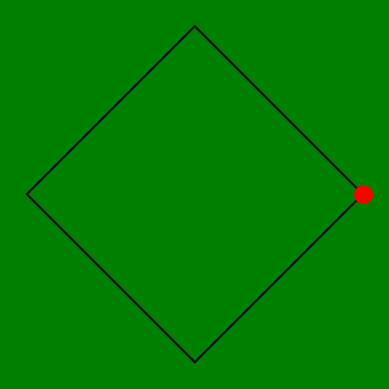

In [68]:
        
# draw the baseball diamond
plt.plot([0, 1], [0, 1], color = "black");
plt.plot([1, 0], [1, 2], color = "black");
plt.plot([0, -1], [2, 1], color = "black");
plt.plot([-1, 0], [1, 0], color = "black");

# make the axes square
plt.axis("square");

# put a runner on first
plt.plot([1], [1], color = "red", marker=".", markersize=25);

# turn off the axis
plt.axis("off");

# make the field green 
plt.gcf().set_facecolor('green')      # a better hexadecimal green: '#86eb34'

## Seaborn!

[Seaborn](https://seaborn.pydata.org/index.html) is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. 

I.e., it is built on top of of matplotlib but produces better looking plots that are easier to create. 

Let's start by examining different themes which can produce better looking plots. We can do this using the `sns.set_theme()` method. 


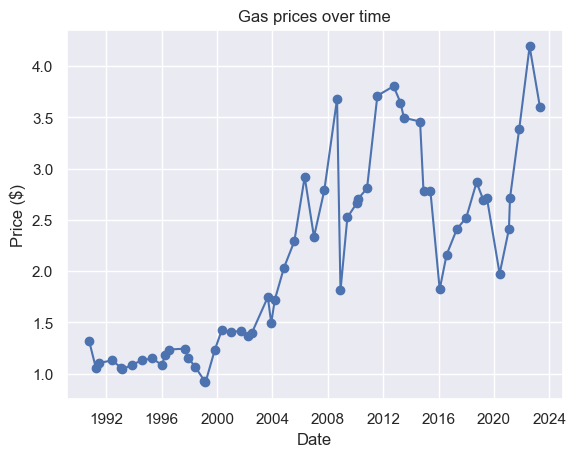

In [69]:
# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()   # default style is 'darkgrid')
#sns.set_theme(style='whitegrid')

# Side note: Matplotlib also has themes
# plt.style.available
# plt.style.use('fivethirtyeight')


# Re-create a line plot of gas prices over time here
plt.plot(prices["Week"], prices["Gas"], "-o");
plt.ylabel("Price ($)");
plt.xlabel("Date");
plt.title("Gas prices over time");

### Plotting relationships between two quantitative variables

We can plot relationships between two quantitative variables using the `sns.relplot()` function


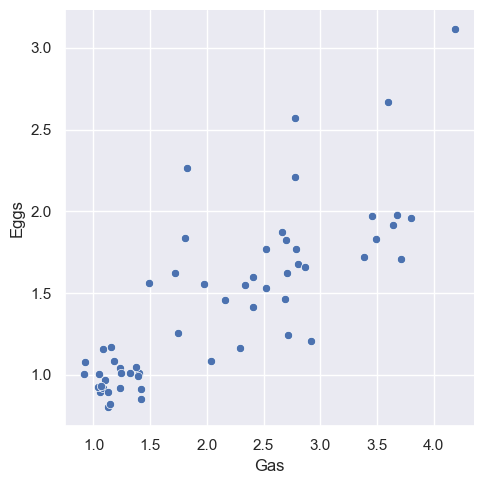

In [70]:
# plot relationship between gas and egg prices
sns.relplot(data = prices, x = "Gas", y = "Eggs");

#### Penguins!

Let's continue to explore the relplot using data on penguins. 

We will also look at mapping other features of our data onto visual properties including: 
- `x`, and `y` column names to be plotted (as we have done before)
- `hue`: The column name to be mapped to the color of the points
- `size`: The column name to be mapped to the size of points
- `style`: The column name to be mapped to the style of the markers
- `col`: fThe column name to be mapped to faceting to compare multiple subplots


In [71]:
# Let's look at some penguins
penguins = sns.load_dataset("penguins")

print(type(penguins))

penguins.head()


<class 'pandas.core.frame.DataFrame'>


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


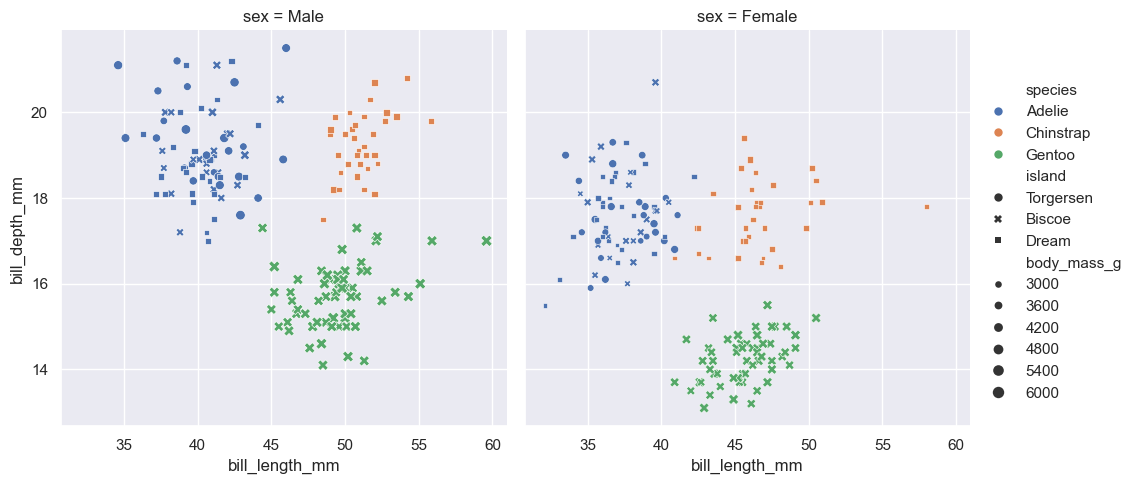

In [72]:
# plotting bill size on x, and y axes and other properties
sns.relplot(data = penguins, 
            x = "bill_length_mm", 
            y = "bill_depth_mm",
            hue = "species",
            size = "body_mass_g",
            style = "island",
            col = "sex");

### Plotting a single quantitative variable

We can plot a single quantitative variables using the `sns.displot()` function.

Properties we can set include
- `x`: The name of the data column you want to plot
- `hue`: The name of the column that colors each point
- `kind` The type of plot

Different options for `kind` are: “hist”, “kde”, “ecdf”


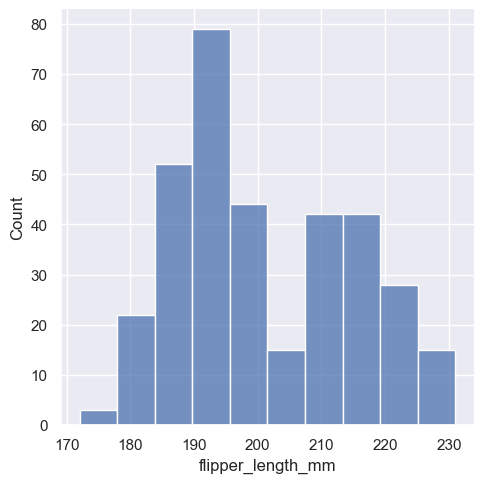

In [73]:
# plot the flipper length
sns.displot(data = penguins, 
            x="flipper_length_mm", 
            #hue="species", 
            kind="hist");

### Plotting a quantitative variable for different categorical variable levels

We can plot a quantitative variable for different categorical variable levels using the `sns.catplot()` function.

We specify: 
- `x`: Cateogoral x-value column name
- `y`: Quantitative y-value column name
- `kind`: The type of plot

The `kind` argument can be set to the following: “strip”, “swarm”, “box”, “violin”, “boxen”, “point”, “bar”, or “count”


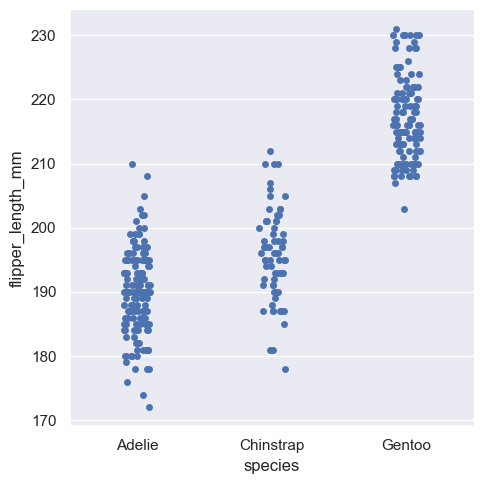

In [74]:
# plot flipper length for the different species using different kinds of plots
sns.catplot(data = penguins, 
            x = "species", 
            y = "flipper_length_mm", 
            kind = "strip");

# also try “strip”, “swarm”, “box”, “violin”, “boxen”, “point”, or “bar”

<img src = "https://i.imgflip.com/1ezfdq.jpg">